### Importação dos dados



Boas vindas ao primeiro desafio!
Durante este desafio, você irá ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. Para isso, você analisará dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store. O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

O que você vai praticar:
Carregar e manipular dados CSV com a biblioteca Pandas .

Criar visualizações de dados com biblioteca Matplotlib.

Analisar métricas como faturamento, avaliações e desempenho de vendas.

Requisitos:
Analisar os dados das lojas:

Você deve avaliar informações como faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.

Criar gráficos para visualização:

Decida quais tipos de gráficos usar para apresentar os resultados de maneira clara e visual.

Mínimo de 3 gráficos diferentes, que podem incluir gráficos de barras, pizza, dispersão, entre outros.

Apresentar uma recomendação:

Após as análises, escreva um texto explicando qual loja o Senhor João deve vender e por quê, com base nos dados apresentados

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
#Primeiro vamos analisar os dataframes para entender a melhor como trabalha a loja
# Sendo assim vou criar uma bibliteca para extrair as informações que preciso.
#tambem preciso separar as colunas necessarias



lojas = {
    'loja 1' : loja,
    'loja 2' : loja2,
    'loja 3' : loja3,
    'loja 4' : loja4
}

colunas_para_analisar = ['Produto', 'Vendedor', 'Categoria do Produto', 'Local da compra', 'Tipo de pagamento']


tabela_resultado = {}

for nome_loja, df_loja in lojas.items():
    resultados = {}
    for coluna in colunas_para_analisar:
      if coluna in df_loja.columns:
            qtde_unicos = df_loja[coluna].nunique()
            resultados[coluna] = qtde_unicos
      else:
            resultados[coluna] = 'N/A'
    tabela_resultado[nome_loja] = resultados


df_resultado = pd.DataFrame(tabela_resultado).T

# Exibe o resultado
print("\n--- Tabela de Valores Únicos por Loja ---")
display(df_resultado)




--- Tabela de Valores Únicos por Loja ---


,Produto,Vendedor,Categoria do Produto,Local da compra,Tipo de pagamento
loja 1,51,14,8,26,4
loja 2,51,14,8,26,4
loja 3,51,14,8,27,4
loja 4,51,14,8,25,4


In [ ]:
faturamento_por_loja = {}


for nome_loja, df_loja in lojas.items():
  if "Preço" in df_loja.columns:
    faturamento_total = df_loja['Preço'].sum()
    faturamento_por_loja[nome_loja] = faturamento_total
  else:
    print(f'A loja {nome_loja} não possui a coluna "Preço" ')


for loja, valor in faturamento_por_loja.items():
  print(f'{loja}: R$ {valor:,.2f}')


loja 1: R$ 1,534,509.12
loja 2: R$ 1,488,459.06
loja 3: R$ 1,464,025.03
loja 4: R$ 1,384,497.58


In [ ]:
faturamento_geral = sum(faturamento_por_loja.values())

for loja, valor in faturamento_por_loja.items():

  Participacao_das_vendas = valor / faturamento_geral

  print(f"{loja} tem a participação de {Participacao_das_vendas:.2%}")

loja 1 tem a participação de 26.13%
loja 2 tem a participação de 25.35%
loja 3 tem a participação de 24.93%
loja 4 tem a participação de 23.58%


# 2. Vendas por Categoria


In [ ]:
categorias = {}

for nome_loja, df_loja in lojas.items():
  if 'Categoria do Produto' in df_loja.columns:
    categorias_unicas = df_loja['Categoria do Produto'].unique().tolist()
    categorias_unicas.sort()
    categorias[nome_loja] = categorias_unicas
  else:
    print(f'A loja {nome_loja} não possui a coluna "Categoria do Produto" ')

df_venda_categoria = pd.DataFrame(categorias).T


display(df_venda_categoria)



,0,1,2,3,4,5,6,7
loja 1,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
loja 2,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
loja 3,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
loja 4,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas


In [ ]:
vendas_categorias = {}

for nome_loja, df_loja in lojas.items():
  venda_por_categoria = {}

  if "Categoria do Produto" in df_loja.columns and "Preço" in df_loja.columns:
    categorias_loja = df_loja['Categoria do Produto'].unique()

    for categoria in categorias_loja:
      df_categoria = df_loja[df_loja['Categoria do Produto'] == categoria]

      valor_venda_categoria = df_categoria['Preço'].sum()

      venda_por_categoria[categoria] = valor_venda_categoria

      faturamento_total_categorias = sum(venda_por_categoria.values())
  else:
    print(f'A loja {nome_loja} não possui as colunas "Categoria do Produto" ou "Preço" para cálculo detalhado.')

  vendas_categorias[nome_loja] = venda_por_categoria

df_venda_por_categoria = pd.DataFrame(vendas_categorias)
df_venda_por_categoria.loc['Total'] = df_venda_por_categoria.sum()


display(df_venda_por_categoria.style.format(precision=2))

,loja 1,loja 2,loja 3,loja 4
eletronicos,572659.23,547773.71,547699.92,545966.86
moveis,250178.11,235234.68,268095.56,256705.65
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83
esporte e lazer,52387.55,46326.09,47456.10,44465.65
livros,11713.92,13454.35,12664.70,12427.77
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
Total,1534509.12,1488459.06,1464025.03,1384497.58


# 3. Média de Avaliação das Lojas

In [ ]:
Avaliação_de_compra = {}

for nome_loja, df_loja in lojas.items():
  if "Avaliação da compra" in df_loja.columns:
    media_avaliaçao = df_loja['Avaliação da compra'].mean()
    Avaliação_de_compra[nome_loja] = media_avaliaçao
  else:
    print(f'A {nome_loja}, não possui avaliação')

for loja, media in Avaliação_de_compra.items():
  print(f"A {loja} tem a media de {media:.2f} de Avaliação")



A loja 1 tem a media de 3.98 de Avaliação
A loja 2 tem a media de 4.04 de Avaliação
A loja 3 tem a media de 4.05 de Avaliação
A loja 4 tem a media de 4.00 de Avaliação


In [ ]:
media_por_categoria = {}

for nome_loja, df_loja in lojas.items():
  if "Categoria do Produto" in df_loja.columns and "Avaliação da compra" in df_loja.columns:
    categorias = df_loja["Categoria do Produto"].unique()
    media_categoria = {}

    for categoria in categorias:
      df_categoria = df_loja[df_loja["Categoria do Produto"] == categoria]
      media = df_categoria["Avaliação da compra"].mean()
      media_categoria[categoria] = media

    media_por_categoria[nome_loja] = media_categoria
  else:
    print(f"A {nome_loja} não possui colunas necessárias.")

df_media_por_categoria = pd.DataFrame(media_por_categoria)
df_media_por_categoria.loc["Media"] = df_media_por_categoria.mean()

display(df_media_por_categoria)



,loja 1,loja 2,loja 3,loja 4
eletronicos,4.004464,3.971564,3.986696,4.006652
moveis,3.946237,4.092760,4.098196,3.997917
brinquedos,4.077160,4.025559,4.196825,3.988166
eletrodomesticos,4.032051,4.072131,4.010791,3.929134
utilidades domesticas,3.748538,4.071823,4.073446,4.009950
esporte e lazer,3.897887,4.065455,3.938628,4.054152
livros,3.976879,3.949239,4.048649,4.042781
instrumentos musicais,4.049451,4.035714,4.005650,3.911765
Media,3.966583,4.035531,4.044860,3.992564


# 4. Produtos Mais e Menos Vendidos

In [ ]:
produto_mais_vendido = {}
produto_menos_vendido = {}

for nome_loja, df_loja in lojas.items():

  if "Produto" in df_loja.columns and "Preço" in df_loja.columns:
    Produtos = df_loja["Produto"].unique()
    venda_produtos = {}

    for produto in Produtos:
      df_produtos = df_loja[df_loja["Produto"] == produto]
      venda_total_produtos = df_produtos["Preço"].sum()
      venda_produtos[produto] = venda_total_produtos

    # Produto mais e menos vendido por loja
    produto_mais_vendido_nome = max(venda_produtos, key=venda_produtos.get)
    produto_mais_vendido_faturamento = venda_produtos[produto_mais_vendido_nome]
    produto_mais_vendido[nome_loja] = (produto_mais_vendido_nome, produto_mais_vendido_faturamento) # Armazena uma tupla com nome e faturamento

    # Encontre o nome do produto menos vendido e seu faturamento
    produto_menos_vendido_nome = min(venda_produtos, key=venda_produtos.get)
    produto_menos_vendido_faturamento = venda_produtos[produto_menos_vendido_nome]
    produto_menos_vendido[nome_loja] = (produto_menos_vendido_nome, produto_menos_vendido_faturamento) # Armazena uma tupla com nome e faturamento

    df_faturamento_total_produto = pd.DataFrame.from_dict(
        venda_produtos, orient='index', columns=[f'{nome_loja} - Faturamento']
    )



  else:
    print(f"A loja {nome_loja} não tem produtos")


df_produto_mais_vendido = pd.DataFrame.from_dict(produto_mais_vendido, orient='index', columns=['Produto Mais Vendido', 'Faturamento'])

df_produto_menos_vendido = pd.DataFrame.from_dict(produto_menos_vendido, orient='index', columns=['Produto Menos Vendido', 'Faturamento'])


display(df_produto_menos_vendido, df_produto_mais_vendido)


,Produto Menos Vendido,Faturamento
loja 1,Corda de pular,870.89
loja 2,Cubo mágico 8x8,858.22
loja 3,Cubo mágico 8x8,853.81
loja 4,Corda de pular,939.74


,Produto Mais Vendido,Faturamento
loja 1,TV Led UHD 4K,189534.28
loja 2,Celular Plus X42,150967.83
loja 3,Geladeira,133185.99
loja 4,Celular Plus X42,128930.07


# 5. Frete Médio por Loja


In [ ]:
for nome_loja, df_loja in lojas.items():
    print(f"Colunas da {nome_loja}: {df_loja.columns.tolist()}")

Colunas da loja 1: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Colunas da loja 2: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Colunas da loja 3: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Colunas da loja 4: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']


In [ ]:
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
qtde_vendas = {}

for nome_loja, df_loja in lojas.items():
    qtde_vendas[nome_loja] = len(df_loja)

df_qtde_vendas = pd.DataFrame.from_dict(qtde_vendas, orient='index', columns=['QtdeVendas'])
df_qtde_vendas.loc['Total'] = df_qtde_vendas.sum()
display(df_qtde_vendas)

,QtdeVendas
loja 1,2359
loja 2,2359
loja 3,2359
loja 4,2358
Total,9435


In [ ]:
total_frete = {}

for nome_loja, df_loja in lojas.items():
    total_frete[nome_loja] = df_loja['Frete'].sum()

soma_total_frete = sum(total_frete.values())

df_total_frete = pd.DataFrame.from_dict(total_frete, orient='index', columns=['TotalFrete'])
df_total_frete.loc['Total'] = df_total_frete.sum()
display(df_total_frete)

,TotalFrete
loja 1,81837.967796
loja 2,79314.158013
loja 3,78022.661223
loja 4,73755.875119
Total,312930.662150


In [ ]:
for loja, df_loja in total_frete.items():

  parti_frete = df_loja / soma_total_frete

  print(f'A loja {loja}, tem a participação de {parti_frete:.2%} no frete total')





A loja loja 1, tem a participação de 26.15% no frete total
A loja loja 2, tem a participação de 25.35% no frete total
A loja loja 3, tem a participação de 24.93% no frete total
A loja loja 4, tem a participação de 23.57% no frete total


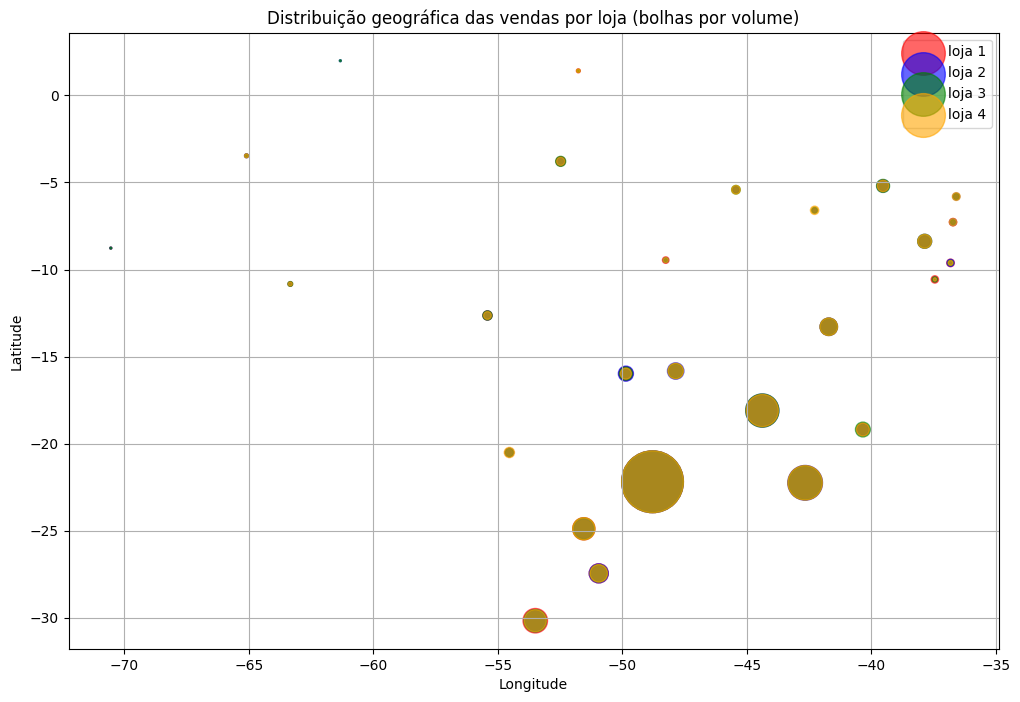

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar todas as coordenadas por loja
dados_agrupados = []

for nome_loja, df_loja in lojas.items():
    if {'lat', 'lon'}.issubset(df_loja.columns):
        com_coords = df_loja.dropna(subset=['lat', 'lon'])
        if not com_coords.empty:
            agrupado = com_coords.groupby(['lat', 'lon']).size().reset_index(name='contagem')
            agrupado['loja'] = nome_loja
            dados_agrupados.append(agrupado)

# Juntar tudo em um único DataFrame
df_final = pd.concat(dados_agrupados, ignore_index=True)

# Plotar
plt.figure(figsize=(12, 8))
cores = ['red', 'blue', 'green', 'orange']
lojas_unicas = df_final['loja'].unique()

for i, loja in enumerate(lojas_unicas):
    df_loja = df_final[df_final['loja'] == loja]
    plt.scatter(df_loja['lon'], df_loja['lat'],
                s=df_loja['contagem'] * 2,  # tamanho proporcional
                alpha=0.6,
                label=loja,
                color=cores[i])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição geográfica das vendas por loja (bolhas por volume)')
plt.legend()
plt.grid(True)
plt.show()

 _______Analise Final para tomada de Decisão ______

O total de Faturamento por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58
Gráfico de Pizza


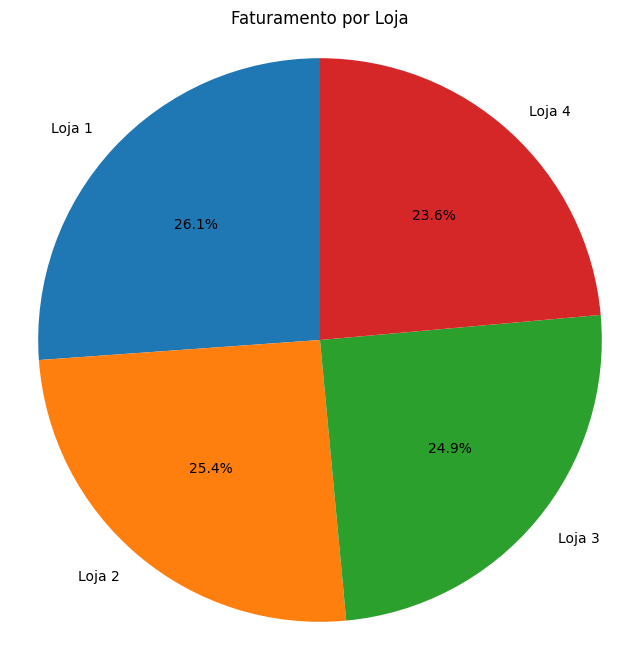

Gráfico de barras 


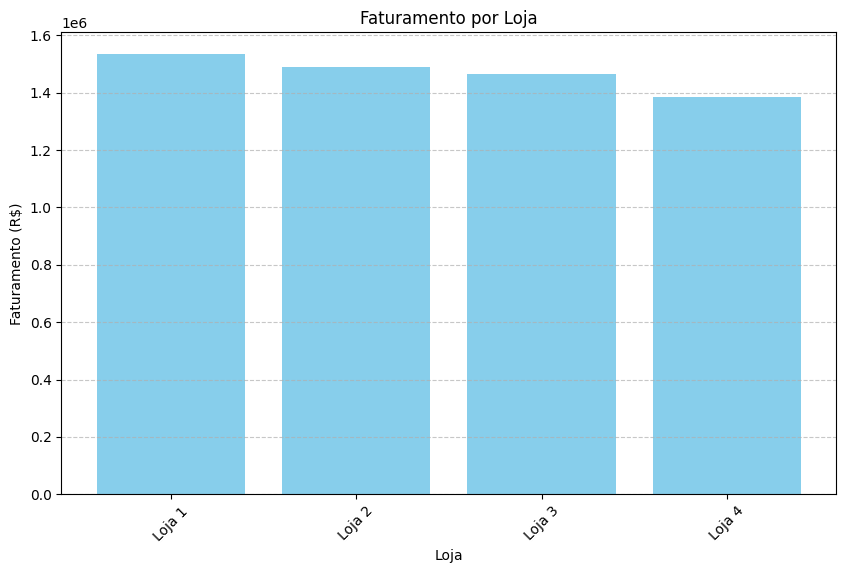


Participação de Vendas de Cada Loja:
Loja 1 tem a participação de 26.13%
Loja 2 tem a participação de 25.35%
Loja 3 tem a participação de 24.93%
Loja 4 tem a participação de 23.58%

Avaliação de Cada Loja:
A Loja 1 tem a média de 3.98 de Avaliação
A Loja 2 tem a média de 4.04 de Avaliação
A Loja 3 tem a média de 4.05 de Avaliação
A Loja 4 tem a média de 4.00 de Avaliação
Gráfico de Barras 


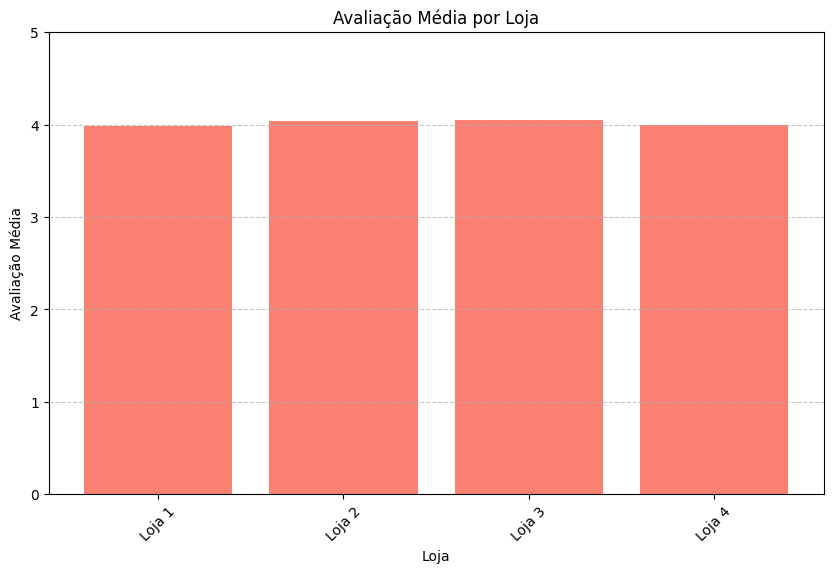

,loja 1,loja 2,loja 3,loja 4
eletronicos,572659.23,547773.71,547699.92,545966.86
moveis,250178.11,235234.68,268095.56,256705.65
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83
esporte e lazer,52387.55,46326.09,47456.10,44465.65
livros,11713.92,13454.35,12664.70,12427.77
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
Total,1534509.12,1488459.06,1464025.03,1384497.58



Produtos Mais e Menos Vendidos:

Frete gasto por loja:
A loja loja 1 tem a participação de 26.15% no frete total
A loja loja 2 tem a participação de 25.35% no frete total
A loja loja 3 tem a participação de 24.93% no frete total
A loja loja 4 tem a participação de 23.57% no frete total


In [ ]:
print(" _______Analise Final para tomada de Decisão ______")

print('\nO total de Faturamento por loja:')

for loja, valor in faturamento_por_loja.items():
    print(f'{loja}: R$ {valor:,.2f}')

labels = list(faturamento_por_loja.keys())
valores = list(faturamento_por_loja.values())

print('Gráfico de Pizza')


plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Faturamento por Loja')
plt.axis('equal')  # Deixa o gráfico redondo
plt.show()


print('Gráfico de barras ')


plt.figure(figsize=(10, 6))
plt.bar(labels, valores, color='skyblue')
plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('\nParticipação de Vendas de Cada Loja:')

for loja, valor in faturamento_por_loja.items():

  Participacao_das_vendas = valor / faturamento_geral

  print(f"{loja} tem a participação de {Participacao_das_vendas:.2%}")

print("\nAvaliação de Cada Loja:")

for loja, media in Avaliação_de_compra.items():
    print(f"A {loja} tem a média de {media:.2f} de Avaliação")

print('Gráfico de Barras ')


lojas = list(Avaliação_de_compra.keys())
avaliacoes = list(Avaliação_de_compra.values())

plt.figure(figsize=(10, 6))
plt.bar(lojas, avaliacoes, color='salmon')
plt.title('Avaliação Média por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.ylim(0, 5)  # Ajuste conforme a escala de avaliação
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(df_venda_por_categoria.style.format(precision=2))

print("\nProdutos Mais e Menos Vendidos:")



print('\nFrete gasto por loja:')

for loja, df_loja in total_frete.items():
    parti_frete = df_loja / soma_total_frete
    print(f'A loja {loja} tem a participação de {parti_frete:.2%} no frete total')

 _______Analise Final para tomada de Decisão ______

O total de Faturamento por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58

Gráfico de Barras - Faturamento por Loja (Estilo Notebook)


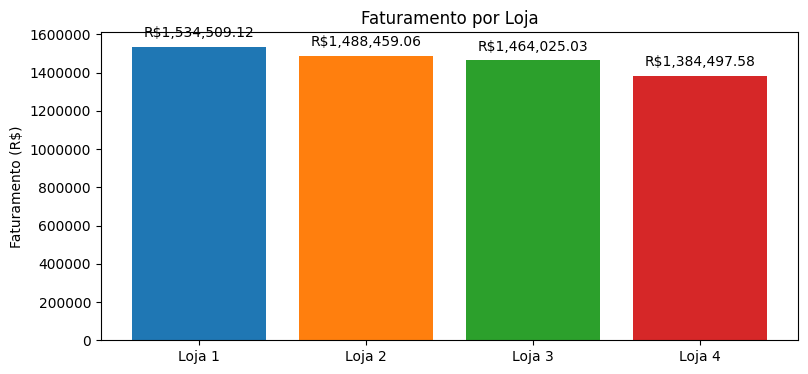


Gráficos de Pizza - Distribuição de Categorias (Estilo Notebook)


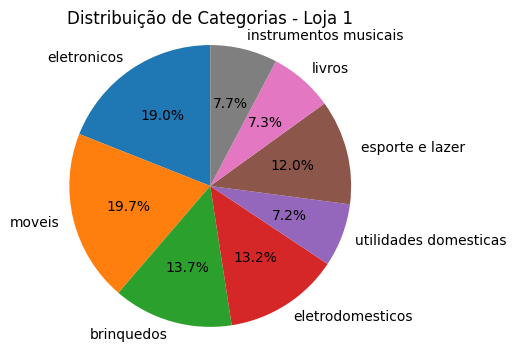

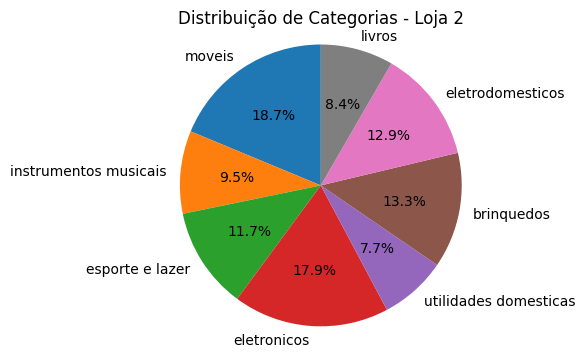

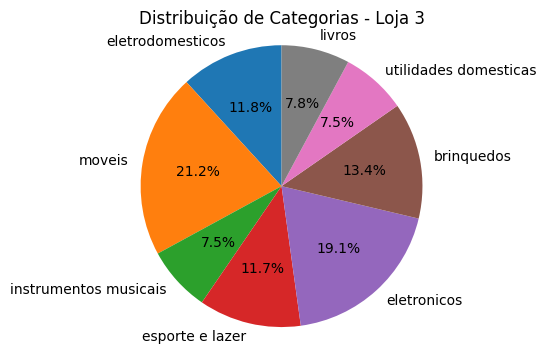

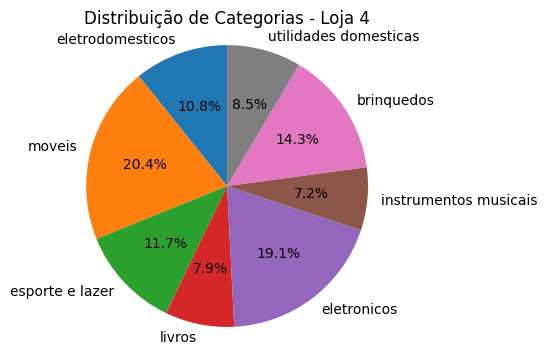


Avaliação de Cada Loja:
A Loja 1 tem a média de 3.98 de Avaliação
A Loja 2 tem a média de 4.04 de Avaliação
A Loja 3 tem a média de 4.05 de Avaliação
A Loja 4 tem a média de 4.00 de Avaliação

Gráfico de Linha - Média de Avaliação por Loja (Estilo Notebook)


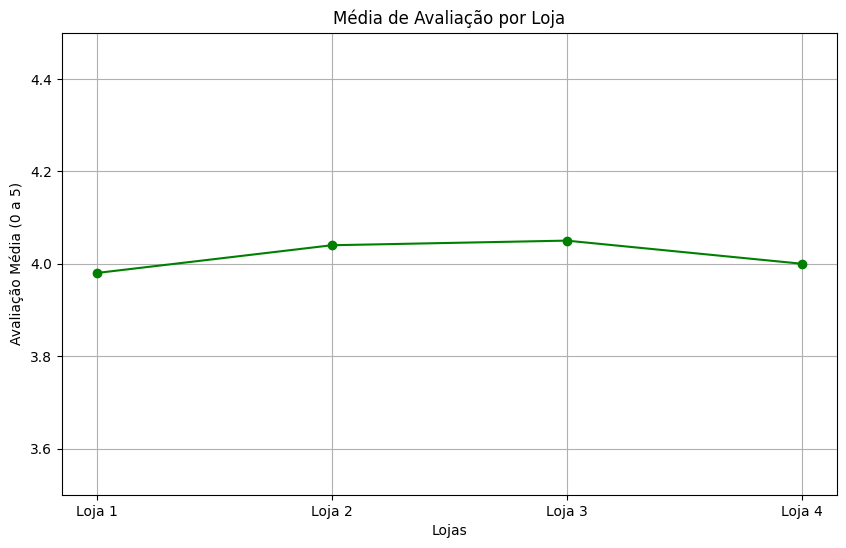


Frete gasto por loja:

Gráfico de Barras - Frete Médio por Loja (Estilo Notebook)


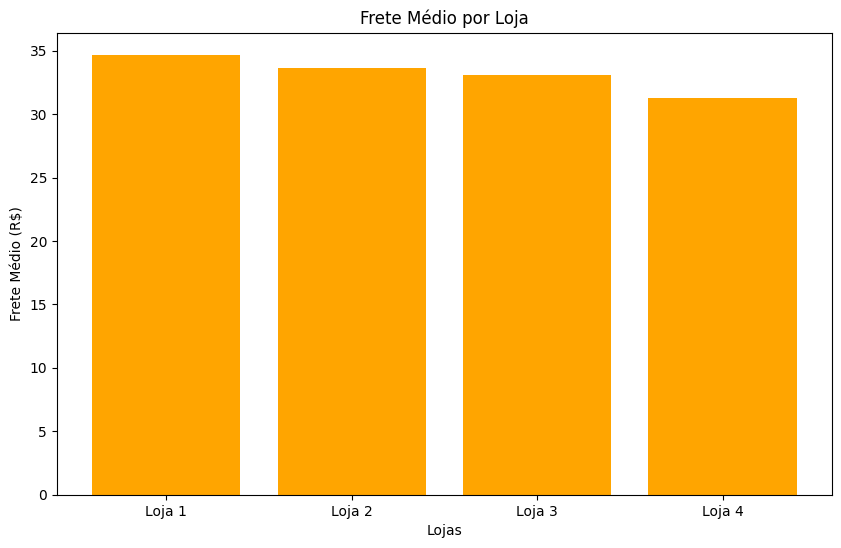

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd





print(" _______Analise Final para tomada de Decisão ______")


print('\nO total de Faturamento por loja:')
# Supondo que faturamento_por_loja é um dicionário como no exemplo acima
for loja, valor in faturamento_por_loja.items():
    print(f'{loja}: R$ {valor:,.2f}')

faturamentos_list = list(faturamento_por_loja.values())
lojas_nomes_list = list(faturamento_por_loja.keys())

print('\nGráfico de Barras - Faturamento por Loja (Estilo Notebook)')
plt.figure(figsize=(9, 4))
cores_faturamento = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.bar(lojas_nomes_list, faturamentos_list, color=cores_faturamento[:len(lojas_nomes_list)])
plt.ticklabel_format(axis='y', style='plain') # Formatação do eixo Y como no notebook
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
# Adicionar anotações de valor
for i in range(len(faturamentos_list)):
  valor = faturamentos_list[i]
  # Ajuste o offset (ex: valor + 50000) conforme a escala dos seus dados para as anotações
  plt.text(i, valor + 50000, f'R${valor:,.2f}', ha='center')
plt.show()


# Se você tiver faturamento_geral definido, pode descomentar esta parte
# print('\nParticipação de Vendas de Cada Loja:')
# faturamento_geral = sum(faturamento_por_loja.values()) # Exemplo de cálculo
# for loja, valor in faturamento_por_loja.items():
#   Participacao_das_vendas = valor / faturamento_geral
#   print(f"{loja} tem a participação de {Participacao_das_vendas:.2%}")


# === GRÁFICOS 2: DISTRIBUIÇÃO DE CATEGORIAS POR LOJA (Pizza - Estilo Notebook) ===
print('\nGráficos de Pizza - Distribuição de Categorias (Estilo Notebook)')
# Use seus dados reais aqui. Os _vendas_lojaX são placeholders com os dados do notebook.
# Você pode ter um DataFrame `df_venda_por_categoria` e precisará extrair
# os dados para cada loja em um formato de dicionário {'categoria': contagem}.
# Ex: se df_venda_por_categoria.columns são ['Loja 1', 'Loja 2', ...]
# e os índices são as categorias:
# _vendas_loja1 = df_venda_por_categoria['Loja 1'].dropna().to_dict()
# ... e assim por diante.

lista_vendas_por_loja_data = {
    'Loja 1': _vendas_loja1,
    'Loja 2': _vendas_loja2,
    'Loja 3': _vendas_loja3,
    'Loja 4': _vendas_loja4
}

for nome_loja, vendas_data in lista_vendas_por_loja_data.items():
    if not vendas_data: # Pular se os dados da loja estiverem vazios
        print(f"Dados de vendas para {nome_loja} não encontrados, pulando gráfico de pizza.")
        continue

    categorias = list(vendas_data.keys())
    quantidades = list(vendas_data.values())

    plt.figure(figsize=(4, 4))
    plt.pie(quantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribuição de Categorias - {nome_loja}')
    plt.axis('equal') # Garante que a pizza seja circular
    plt.show()

# Se você exibe o DataFrame df_venda_por_categoria, pode manter:
# if 'df_venda_por_categoria' in locals():
#    display(df_venda_por_categoria.style.format(precision=2))


# === GRÁFICO 3: MÉDIA DE AVALIAÇÃO POR LOJA (Linha - Estilo Notebook) ===
print("\nAvaliação de Cada Loja:")
# Supondo que Avaliação_de_compra é um dicionário como no exemplo
for loja, media in Avaliação_de_compra.items():
    print(f"A {loja} tem a média de {media:.2f} de Avaliação")

lojas_nomes_aval = list(Avaliação_de_compra.keys())
avaliacoes_medias_list = list(Avaliação_de_compra.values())

print('\nGráfico de Linha - Média de Avaliação por Loja (Estilo Notebook)')
plt.figure(figsize=(10, 6)) # Tamanho da figura
plt.plot(lojas_nomes_aval, avaliacoes_medias_list, marker='o', linestyle='-', color='green')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Avaliação Média (0 a 5)')
plt.xlabel('Lojas')
plt.ylim(3.5, 4.5) # Limite do eixo Y como no notebook
plt.grid(True) # Grade como no notebook
plt.show()


# Se você exibe DataFrames de produtos mais/menos vendidos, pode manter:
# print("\nProdutos Mais e Menos Vendidos:")
# if 'produto_mais_vendido' in locals() and 'df_produto_menos_vendido' in locals():
#    df_produto_mais_vendido = pd.DataFrame.from_dict(produto_mais_vendido, orient='index', columns=['Produto Mais Vendido', 'Faturamento'])
#    display(df_produto_menos_vendido, df_produto_mais_vendido)


# === GRÁFICO 4: FRETE MÉDIO POR LOJA (Barras - Estilo Notebook) ===
print('\nFrete gasto por loja:')
# O código do usuário tinha 'total_frete' e calculava participação.
# O notebook usa fretes médios individuais.
# Vamos assumir que você tem uma lista ou dicionário de fretes médios.
# Usando os placeholders _frete_medio_lojaX com dados do notebook:

fretes_medios_list = [_frete_medio_loja1, _frete_medio_loja2, _frete_medio_loja3, _frete_medio_loja4]
# Se você tiver um dicionário total_frete = {'Loja 1': media1, ...}:
# fretes_medios_list = list(total_frete.values())
# lojas_nomes_list_frete = list(total_frete.keys()) # Use este para labels se os nomes das lojas forem diferentes

# Se você tiver soma_total_frete definido, pode descomentar esta parte
# if 'total_frete' in locals() and 'soma_total_frete' in locals() and soma_total_frete > 0 :
#    for loja, valor_frete in total_frete.items():
#        parti_frete = valor_frete / soma_total_frete
#        print(f'A loja {loja} tem a participação de {parti_frete:.2%} no frete total')
# else:
#    # Imprime os valores de frete médio se não houver soma_total_frete
#    for i, nome_loja in enumerate(lojas_nomes_list):
#        print(f'Frete médio para {nome_loja}: R$ {fretes_medios_list[i]:.2f}')


print('\nGráfico de Barras - Frete Médio por Loja (Estilo Notebook)')
plt.figure(figsize=(10, 6)) # Tamanho da figura
plt.bar(lojas_nomes_list, fretes_medios_list, color='orange') # Usando lojas_nomes_list que já deve estar definido
plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.xlabel('Lojas')
plt.show()

# Se você tiver um display de df_venda_por_categoria, pode mantê-lo aqui ou onde preferir
# if 'df_venda_por_categoria' in locals() and isinstance(df_venda_por_categoria, pd.DataFrame):
# print("\nDetalhes de Vendas por Categoria:")
# display(df_venda_por_categoria.style.format(precision=2))

Após analisar o desempenho das quatro lojas com base em faturamento, categorias de produtos, avaliações, produtos mais vendidos e custos com frete, ficou evidente que a Loja 1 se destaca em receita e vendas de eletrônicos, especialmente televisores. Já a Loja 4, embora tenha o menor faturamento, apresenta custos logísticos reduzidos e uma distribuição mais equilibrada de produtos, como celulares. O diferencial mais relevante, porém, é o seu alcance nacional, enquanto as demais operam de forma regional.

Considerando o potencial de crescimento, estabilidade em diferentes regiões e a estrutura nacional da Loja 4, minha recomendação é pela venda da Loja 2. Esta loja, apesar de regional, não apresenta desempenho expressivo em nenhum dos critérios analisados e não demonstra sinais de expansão. Logo, é a que possui menor valor estratégico no médio e longo prazo.